In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
import ipdb

In [2]:
#n_preserved,ns_preserved
lab_strength_nonmil = {"evp":  [212832, 93352],
                       "dsp":  [212832, 88517],
                       "md":   [276144, 87796],
                       "evsp": [212833, 52575],
                       "fm":   [212832, 80885],
                       "mdsp": [50024, 40864]}

lab_strength_mil = {"gsp": [212832, 93316, 3546]}


In [3]:
def coeff_var(signal, total):
    noise = total-signal
    return noise/signal

def deg_sup(signal, total):
    return signal/total

In [4]:
S_dict_nonmil = {}
for k in lab_strength_nonmil.keys():
    stats = lab_strength_nonmil[k]
    S_dict_nonmil[k+"-p"] = deg_sup(stats[1], stats[0])
    S_dict_nonmil[k+"-f"] = 1
    
S_dict_mil = {}
for k in lab_strength_mil.keys():
    stats = lab_strength_mil[k]
    S_dict_mil[k+"-p"] = deg_sup(stats[2], stats[0])
    S_dict_mil[k+"-f"] = deg_sup(stats[2], stats[1])

In [5]:
results = pd.read_csv("outputs/master_scores.csv")

In [6]:
results

,experiment,patch_auroc,patch_auprc,patch_ap,acc_topk_maj,acc_all_max,acc_all_maj,acc_all_weight,acc_all_caucus_max,acc_all_caucus_maj,...,sam_overlap,sam_sens,sam_spec,sam_diff,sam_scagcos,sam_mae,sam_f,sam_s,sam_e,sam_ssim
0,VGG_att_extreme_value_pixels_background_inheri...,1.000000,1.000000,1.000000,1.000,0.5,0.760,0.5,0.646,0.667,...,0.749 (0.122),0.433 (0.123),0.985 (0.009),0.327 (0.067),0.361 (0.111),31.414 (4.148),0.489 (0.102),0.003 (0.004),0.542 (0.046),0.227 (0.061)
1,VGG19_extreme_value_pixels_background_inheritance,1.000000,1.000000,1.000000,1.000,0.5,0.760,0.5,0.646,0.667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,VGG19_distribution_shifted_pixels_background_i...,0.500000,0.750014,0.500028,0.500,0.5,0.500,0.5,0.500,0.500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,VGG_att_distribution_shifted_pixels_background...,1.000000,1.000000,1.000000,1.000,0.5,0.750,0.5,0.688,0.667,...,0.930 (0.068),0.493 (0.114),0.990 (0.005),0.285 (0.066),0.170 (0.068),0.831 (0.112),0.585 (0.098),0.541 (0.016),0.610 (0.045),0.412 (0.054)
4,VGG19_distribution_shifted_pixels_none_inherit...,0.500000,0.750000,0.500000,0.500,0.5,0.500,0.5,0.500,0.500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,VGG_att_distribution_shifted_pixels_none_inher...,0.874190,0.886677,0.886389,1.000,0.5,0.979,0.5,0.583,0.938,...,0.306 (0.084),0.105 (0.029),0.785 (0.060),0.671 (0.019),0.649 (0.096),936.125 (92.844),0.211 (0.058),0.001 (0.000),0.250 (0.000),0.000 (0.000)
6,VGG19_morphological_differences_superpixels_ba...,0.500000,0.752010,0.504020,0.500,0.5,0.500,0.5,0.500,0.500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,VGG_att_morphological_differences_superpixels_...,0.565635,0.592990,0.593215,0.583,0.5,0.500,0.5,0.500,0.500,...,0.936 (0.105),0.144 (0.037),0.997 (0.002),0.569 (0.041),0.457 (0.075),310.136 (21.623),0.390 (0.078),0.000 (0.000),0.258 (0.015),0.000 (0.000)
8,VGG19_morphological_differences_background_inh...,0.500000,0.796239,0.592478,0.500,0.5,0.500,0.5,0.607,0.500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,VGG_att_morphological_differences_background_i...,0.904779,0.932516,0.925994,1.000,0.5,0.536,0.5,0.491,0.509,...,0.956 (0.015),0.519 (0.096),0.988 (0.004),0.259 (0.060),0.135 (0.045),144.399 (19.713),0.625 (0.086),0.000 (0.000),0.657 (0.042),0.231 (0.054)


In [8]:
from operator import itemgetter
import math

def find_maxes(df):
    df = df.reset_index()  # make sure indexes pair with number of rows
    entries = []
    for index, row in df.iterrows():
        col_entries = []
        for idx, entry in enumerate(row):
            if idx > 1:
                col_entries.append(entry)
        entries.append(col_entries)
        
    # now go through and parse strings and find maxes
    maxes = []
    for row in entries:
        row_parsed = []
        for entry in row:
            print(entry, type(entry))
            if isinstance(entry,str):
                if ("(" in entry): # valid point with CI
                    p1 = entry.split("(")
                    point = np.float(p1[0])
                    ci = np.float(p1[1].split(")")[0])
                    row_parsed.append((point, ci))
                
        max_entry = max(row_parsed,key=itemgetter(0))[0] # still need to get ci's
        maxes.append(max_entry)

    return maxes

In [9]:
def strip_means(val_str):
    ret = np.float(0)
    if isinstance(val_str, str):
        mean_str = val_str.split("(")[0]
        ret = np.float(mean_str)
    return ret

def strip_cis(val_str):
    ret = np.float(0) # nan
    if isinstance(val_str, str):
        ci_str = val_str.split("(")[1].split(")")[0]
        ret = np.float(ci_str)
    return ret

In [10]:
import ipdb
import seaborn as sns
import warnings
from matplotlib.pyplot import figure
warnings.filterwarnings('ignore')

In [11]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)


In [12]:
def get_experiment_match(exp_str):
    short_str = "".join([word[0] for word in exp_str.split("_")])
    return short_str

In [40]:
def return_plot_indices(groupedvalues, map_type):
    if groupedvalues["map"].iloc[0] == "ppm":
        if map_type=="all" or map_type=="both" or map_type=="prediction":
            i_idx = 0
    elif groupedvalues["map"].iloc[0] == "pcm":
        if map_type=="all" or map_type=="confidence":
            i_idx = 1
    elif groupedvalues["map"].iloc[0] == "ssm":
        if map_type=="all":
            i_idx = 2
        elif map_type=="both":
            i_idx = 1
        elif map_type=="explanation":
            i_idx = 0
            
    elif groupedvalues["map"].iloc[0] == "sam":
        if map_type=="all":
            i_idx = 3
        elif map_type=="both":
            i_idx = 2
        elif map_type=="explanation":
            i_idx = 1
    
    if groupedvalues["model"].iloc[0] == "VGG-19":
        j_idx = 0
    elif groupedvalues["model"].iloc[0] == "VGG-Att":
        j_idx = 1
    
    return i_idx, j_idx

In [175]:
def sepbars_plotter(scenario, results, stat_list, sup_dict, map_type="both", mil_flag=False):
    if mil_flag == True:
        mil_str = "MIL datasets"
    else:
        mil_str = "Non-MIL datasets"
    
    if scenario == "evp":
        exp_str = "extreme_value_pixels"
    elif scenario == "dsp":
        exp_str = "distribution_shifted_pixels"
    elif scenario == "md":
        exp_str = "morphological_differences"
    elif scenario == "mdsp":
        exp_str = "morphological_differences_superpixels"
    elif scenario == "evsp":
        exp_str = "extreme_value_superpixels"
    elif scenario == "gsp":
        exp_str = "guilty_superpixels"
    elif scenario == "fm":
        exp_str = "fractal_morphologies"
    else:
        pass
    
    legit_words = ["extreme", "value", "pixels", "distribution", "shifted", "guilty",
                   "morphological", "differences", "superpixels", "fractal", "morphologies"]
    
    stat_list = ["_"+s for s in stat_list]
    results['exp_terms'] = results['experiment'].apply(lambda x: "_".join([word  for word in x.split("_") if word in legit_words]))
    # print(results['exp_terms'])

    s_rows = results.loc[results['exp_terms'] == exp_str]
    print(s_rows.shape)
    if s_rows.shape[0] < 4:
        print("Error: Unsubstantial amount of experiments run. Please get predictions first. Exiting.")
        return
    
    # get all cols that are relevant for max
    all_stat_cols = []
    for stat in stat_list:
        stat_cols = [col for col in s_rows.columns if stat in col]
        all_stat_cols.extend(stat_cols)
    stat_cols = all_stat_cols
    
    if map_type == "all":
        stat_cols.extend(["pcm_mae", "pcm_ssim"])
    print(stat_cols)
        
    if map_type == "explanation":
        valid_maps = ["ssm", "sam"]
        c = ["red", "magenta"]
    elif map_type == "prediction":
        valid_maps = ["ppm"]
        c = ["black"]
    elif map_type == "confidence":
        valid_maps = ["pcm"]
        c = ["cyan"]
    elif map_type == "both":
        valid_maps = ["ppm","ssm", "sam"]
        c = ["black", "red", "magenta"]
    elif map_type == "all":
        valid_maps = ["ppm", "pcm", "ssm", "sam"]
        c = ["black", "cyan", "red", "magenta"]
    plot_w = len(valid_maps)

    stat_cols = [s for s in stat_cols if any(substring in s for substring in valid_maps)]
    df = s_rows[["experiment"] + stat_cols]
    
    # create filter, model, labeling_fn rows
    df['filter'] = df['experiment']
    df['model'] = df['experiment']
    df['labeling_fn'] = df['experiment']
    
    # begin featurizing
    df['filter'].loc[df['filter'].str.contains("none")] = "none"
    df['filter'].loc[df['filter'].str.contains("background")] = "background"
    df['model'].loc[df['model'].str.contains("VGG19")] = "VGG-19"
    df['model'].loc[df['model'].str.contains("VGG_att")] = "VGG-Att"
    df['labeling_fn'].loc[df['labeling_fn'].str.contains("inheritance")] = "ili"
    df['labeling_fn'].loc[df['labeling_fn'].str.contains("seg")] = "seg"
    
    molten = pd.melt(df.reset_index(), id_vars=["model", "filter", "labeling_fn"])
    molten = molten[(molten.variable != "index") & (molten.variable != "experiment")]
    
    molten['map'] = molten['variable']
    for vm in valid_maps:
        molten['map'].loc[molten['map'].str.contains(vm)] = vm
    
    molten['stat'] = molten['variable']
    for stat in stat_list:
        stat_str = ""+stat
        if len(stat) < 3:
            stat_str = stat[1:]+"-measure"
        else:
            stat_str = stat[1:]
        molten['stat'].loc[molten['stat'].str.contains(stat)] = stat_str
        
    molten['mean'] = molten["value"].apply(lambda row: strip_means(row))
    molten['ci'] = molten["value"].apply(lambda row: strip_cis(row))
    molten['name'] = molten["map"] + "_" + molten["model"]
    molten['name2'] = molten["map"] + "_" + molten["model"] + "_" + molten["filter"]
    
    # for scagcos
    if "_scagcos" in stat_list:
        molten.loc[(molten['stat'] == "scagcos") & (molten['mean'] != np.nan) & (molten['mean'] != 0), 'mean'] = 1 - molten['mean']
        molten.loc[molten['stat'] == "scagcos", 'stat'] = "scagnostics-\nsimilarity"
    
    molten['full'] = molten["filter"] +"_"+ molten["name"] +"_"+ molten['variable'].map(lambda x: x.split('_')[1])
    molten['order'] = molten["full"]
    counter = 0
    for l,f in enumerate(["background", "none"]):
        for i,s in enumerate(stat_list):
            for j,emap in enumerate(valid_maps):
                for k,model_str in enumerate(["VGG-19", "VGG-Att"]):
                    counter += 1
                    molten['order'].loc[molten['order'] == f+"_"+emap+"_"+model_str+s] = counter
    
    
    molten = molten.sort_values('order')
    
    # make figure
    plot_h=2
    fig, axs = plt.subplots(plot_h, plot_w, sharex=True,sharey=True)

    sns.reset_defaults()
    sns.set_context('paper')

    bar_vals, bar_names = [],[]
    kwargs = {'alpha':1, 'linestyle':'-', 'linewidth':3, 'edgecolor':'w'}
    
    
    for i, g in enumerate(molten.groupby("name2")):
        groupedvalues = g[1]
        i_idx, j_idx = return_plot_indices(groupedvalues, map_type) 
        print(j_idx, i_idx)
        # color = c[i_idx]
        # ipdb.set_trace()
        print(groupedvalues["name2"].iloc[0])
        sns.barplot(data=groupedvalues,
                        ax=axs[j_idx, i_idx],
                         # palette = "Paired", # Paired, Set2
                         y="stat",
                         x="mean",
                         # hue="name2",
                         color=c[i_idx],
                         # saturation = 8,
                         orient="h",
                         ci=None,
                         # order=names,
                         #zorder=-i, # so first bars stay on top
                         **kwargs
                        )
        # axs[j_idx, i_idx].legend_.remove() # remove the redundant legends
        axs[j_idx, i_idx].set_title('')
        axs[j_idx, i_idx].set_xlabel('')
        axs[j_idx, i_idx].set_ylabel('')
        # axs[j_idx, i_idx].set_ylabel('Performance statistic', fontsize=12)
        # axs[j_idx, i_idx].set_xlabel('Mean test-set performance', fontsize=12)

        
        curr_bars, curr_names = [],[]
        for index, row in groupedvalues.iterrows():
            # print(index, row)
            curr_bars.append(row["mean"])
            curr_names.append(row["name"])
        bar_vals.append(curr_bars)
        bar_names.append(curr_names)
        # plt.setp(ax.patches, linewidth=2)

    print(bar_names)
    

    # ax.legend_.remove() # remove the redundant legends 
    # ax.legend().set_title('Map_Model-family')
    denom = (np.array(bar_vals[1]) + np.array(bar_vals[0])) / 2
    num = np.abs(np.array(bar_vals[1]) - np.array(bar_vals[0]))
    print(bar_vals[0])
    print(bar_vals[1])
    print("num", num)
    print("denom", denom)
    Ps = num/denom
    print(Ps)
    
    # change_width(ax, .2)

#     xs, ys = [], []
#     for p in ax.patches:
#         xs.append(p.get_x() + p.get_width() / 2.)
#         ys.append(p.get_height())
    
#     zipped = zip(xs, ys)
#     to_keep = {} # unique xs with max y
#     for z in zipped:
#         x,y = z[0],z[1]
#         if x in to_keep.keys():
#             if y > to_keep[x]:
#                 to_keep[x] = y
#         else:
#             to_keep[x] = y
#     bar_list = to_keep.items()
#     sorted_bar_list = sorted(bar_list)
    
#     sups = [sup_dict[scenario+"-p"], sup_dict[scenario+"-f"]]

#     # annotate
#     for i in range(len(sorted_bar_list)):
#         if np.isnan(Ps[i]):
#             message = "N/A"
#         else:
#             message = format(Ps[i], '.2f')
#         try:
#             if np.abs(sorted_bar_list[i][1] - sorted_bar_list[i+1][1]) < 0.03:
#                 jitter = 6
#             else:
#                 jitter = 0
#         except IndexError:
#             jitter = 0
            
        
#         # jitter = np.random.random(1)[0]*4    
#         ax.annotate(message, 
#                    (sorted_bar_list[i][0], sorted_bar_list[i][1]), 
#                    ha = 'center', va = 'center', 
#                    size=7,
#                    xytext = (0-jitter, 4), 
#                    textcoords = 'offset points')
    
#     degs = ["Low", "High"]
#     num_stats = len(stat_list)
#     for j in range(3):
#         if j == 0:
#             plt.text(num_stats-0.3, 0.5 - 0.05*(j-1), "Degrees of Supervision:", fontweight="bold")
#         else:
#             plt.text(num_stats-0.3, 0.5 - 0.05*(j-1), degs[j-1] + " $S$ = " + format(sups[j-1],'.2f'))
        
    
    fig.suptitle('Learning Potentials for Scenario: ' + scenario.upper(), fontweight="normal", fontsize=15)
    # plt.ylabel('Performance statistic', fontsize=12)
    # plt.xlabel('Mean test-set performance', fontsize=12)
    fig.text(0.5, 0.01, 'Mean test-set performance', ha='center', fontsize=12)
    fig.text(-0.05, 0.5, 'Performance statistic', va='center', rotation='vertical', fontsize=12)
    if map_type == "both":
        fig.text(0.24,  0.9, 'Predictive (PPM)', ha='center', fontsize=10, fontweight="bold")
        fig.text(0.515, 0.9, 'Explanatory (SSM)', ha='center', fontsize=10, fontweight="bold")
        fig.text(0.675, 0.91, 'Explanatory (SAM)', va='center', fontsize=10, fontweight="bold")
    elif map_type == "all":
        fig.text(0.215, 0.9, 'Predictive (PPM)', ha='center', fontsize=7, fontweight="bold")
        fig.text(0.41,  0.9, 'Confidence (PCM)', ha='center', fontsize=7, fontweight="bold")
        fig.text(0.615,  0.9, 'Explanatory (SSM)', ha='center', fontsize=7, fontweight="bold")
        fig.text(0.735, 0.91, 'Explanatory (SAM)', va='center', fontsize=7, fontweight="bold")
    
    fig.text(0.91, 0.75, 'VGG-19', va='center', rotation=270, fontsize=10, fontweight="heavy")
    fig.text(0.91, 0.25, 'VGG-Att', va='center', rotation=270, fontsize=10, fontweight="heavy")
    # labs = ["VGG-19:PPM", "VGG-Att:PPM", "VGG-19:SSM", "VGG-Att:SSM", "VGG-19:SAM", "VGG-Att:SAM"]
    # plt.legend(title='{Architecture}:{Map}', loc=2, labels=labs, bbox_to_anchor=(1.05, 1), borderaxespad=0.)

    plt.show()



(4, 65)
['ppm_f', 'ssm_f', 'sam_f', 'ppm_e', 'ssm_e', 'sam_e', 'ppm_jaccard', 'ssm_jaccard', 'sam_jaccard', 'ppm_scagcos', 'ssm_scagcos', 'sam_scagcos']
0 0
ppm_VGG-19_background
0 0
ppm_VGG-19_none
1 0
ppm_VGG-Att_background
1 0
ppm_VGG-Att_none
0 2
sam_VGG-19_background
0 2
sam_VGG-19_none
1 2
sam_VGG-Att_background
1 2
sam_VGG-Att_none
0 1
ssm_VGG-19_background
0 1
ssm_VGG-19_none
1 1
ssm_VGG-Att_background
1 1
ssm_VGG-Att_none
[['ppm_VGG-19', 'ppm_VGG-19', 'ppm_VGG-19', 'ppm_VGG-19'], ['ppm_VGG-19', 'ppm_VGG-19', 'ppm_VGG-19', 'ppm_VGG-19'], ['ppm_VGG-Att', 'ppm_VGG-Att', 'ppm_VGG-Att', 'ppm_VGG-Att'], ['ppm_VGG-Att', 'ppm_VGG-Att', 'ppm_VGG-Att', 'ppm_VGG-Att'], ['sam_VGG-19', 'sam_VGG-19', 'sam_VGG-19', 'sam_VGG-19'], ['sam_VGG-19', 'sam_VGG-19', 'sam_VGG-19', 'sam_VGG-19'], ['sam_VGG-Att', 'sam_VGG-Att', 'sam_VGG-Att', 'sam_VGG-Att'], ['sam_VGG-Att', 'sam_VGG-Att', 'sam_VGG-Att', 'sam_VGG-Att'], ['ssm_VGG-19', 'ssm_VGG-19', 'ssm_VGG-19', 'ssm_VGG-19'], ['ssm_VGG-19', 'ssm_VGG-19

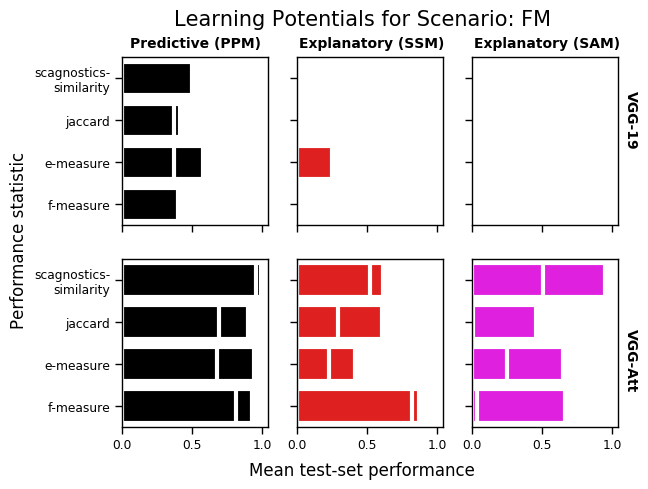

In [178]:
sepbars_plotter("fm", results, ["f", "e", "jaccard", "scagcos"], S_dict_nonmil, map_type="both")

In [12]:
def jointbars_plotter(scenario, results, stat_list, sup_dict, map_type="both", mil_flag=False):
    if mil_flag == True:
        mil_str = "MIL datasets"
    else:
        mil_str = "Non-MIL datasets"
    
    if scenario == "evp":
        exp_str = "extreme_value_pixels"
    elif scenario == "dsp":
        exp_str = "distribution_shifted_pixels"
    elif scenario == "md":
        exp_str = "morphological_differences"
    elif scenario == "mdsp":
        exp_str = "morphological_differences_superpixels"
    elif scenario == "evsp":
        exp_str = "extreme_value_superpixels"
    elif scenario == "gsp":
        exp_str = "guilty_superpixels"
    elif scenario == "fm":
        exp_str = "fractal_morphologies"
    else:
        pass
    
    legit_words = ["extreme", "value", "pixels", "distribution", "shifted", "guilty",
                   "morphological", "differences", "superpixels", "fractal", "morphologies"]
    
    stat_list = ["_"+s for s in stat_list]

    # get relevant experiment rows
    # print(results['experiment'].str.count == len(exp_str))
    # print(results['experiment'].str)
    # print(len(exp_str))
    # print(results['experiment'].astype('str') == exp_str)
    results['exp_terms'] = results['experiment'].apply(lambda x: "_".join([word  for word in x.split("_") if word in legit_words]))

    print(results['exp_terms'])

    
    s_rows = results.loc[results['exp_terms'] == exp_str]

    # s_rows = results.loc[results['experiment'].str.contains(exp_str) & (results['experiment'].str.count == len(exp_str))]
    print(s_rows.shape)
    if s_rows.shape[0] < 4:
        print("Error: Unsubstantial amount of experiments run. Please get predictions first. Exiting.")
        return
    
    # get all cols that are relevant for max
    all_stat_cols = []
    for stat in stat_list:
        stat_cols = [col for col in s_rows.columns if stat in col]
        all_stat_cols.extend(stat_cols)
    stat_cols = all_stat_cols
        
    if map_type == "explanation":
        valid_maps = ["ssm", "sam"]
    elif map_type == "prediction":
        valid_maps = ["ppm"]
    elif map_type == "both":
        valid_maps = ["ppm","ssm", "sam"]

    stat_cols = [s for s in stat_cols if any(substring in s for substring in valid_maps)]
    df = s_rows[["experiment"] + stat_cols]
    # print("rows", df.head())
    
    # create filter, model, labeling_fn rows
    df['filter'] = df['experiment']
    df['model'] = df['experiment']
    df['labeling_fn'] = df['experiment']
    
    # begin featurizing
    # df['filter'].loc[df['filter'].str.contains("none"), "filter"] = "none"
    # df['filter'].loc[df['filter'].str.contains("background"), "filter"] = "background"
    # df['model'].loc[df['model'].str.contains("VGG19"), "model"] = "VGG-19"
    # df['model'].loc[df['model'].str.contains("VGG_att"), "model"] = "VGG-Att"
    # df['labeling_fn'].loc[df['labeling_fn'].str.contains("inheritance"), "labeling_fn"] = "ili"
    # df['labeling_fn'].loc[df['labeling_fn'].str.contains("seg"), "labeling_fn"] = "seg"
    
    df['filter'].loc[df['filter'].str.contains("none")] = "none"
    df['filter'].loc[df['filter'].str.contains("background")] = "background"
    df['model'].loc[df['model'].str.contains("VGG19")] = "VGG-19"
    df['model'].loc[df['model'].str.contains("VGG_att")] = "VGG-Att"
    df['labeling_fn'].loc[df['labeling_fn'].str.contains("inheritance")] = "ili"
    df['labeling_fn'].loc[df['labeling_fn'].str.contains("seg")] = "seg"
    
    molten = pd.melt(df.reset_index(), id_vars=["model", "filter", "labeling_fn"])
    molten = molten[(molten.variable != "index") & (molten.variable != "experiment")]
    
    molten['map'] = molten['variable']
    for vm in valid_maps:
        molten['map'].loc[molten['map'].str.contains(vm)] = vm
    
    molten['stat'] = molten['variable']
    for stat in stat_list:
        stat_str = ""+stat
        if len(stat) < 3:
            stat_str = stat[1:]+"-measure"
        else:
            stat_str = stat[1:]
        molten['stat'].loc[molten['stat'].str.contains(stat)] = stat_str
        
    molten['mean'] = molten["value"].apply(lambda row: strip_means(row))
    molten['ci'] = molten["value"].apply(lambda row: strip_cis(row))
    molten['name'] = molten["map"] + "_" + molten["model"]
    
    #print(molten["mean"])
    # for scagcos
    if "_scagcos" in stat_list:
        molten.loc[(molten['stat'] == "scagcos") & (molten['mean'] != np.nan) & (molten['mean'] != 0), 'mean'] = 1 - molten['mean']
        molten.loc[molten['stat'] == "scagcos", 'stat'] = "scagnostics-\nsimilarity"

    # print(molten)
    
    molten['full'] = molten["filter"] +"_"+ molten["name"] +"_"+ molten['variable'].map(lambda x: x.split('_')[1])
    # print(molten["full"])
    molten['order'] = molten["full"]
    counter = 0
    for l,f in enumerate(["background", "none"]):
        for i,s in enumerate(stat_list):
            for j,emap in enumerate(valid_maps):
                for k,model_str in enumerate(["VGG-19", "VGG-Att"]):
                    # num = ((j+1)*(k+1)) + (6*i)*(4*l)
                    # print(num)
                    counter += 1
                    molten['order'].loc[molten['order'] == f+"_"+emap+"_"+model_str+s] = counter
                
    # print(molten)
    # # get ordering
    # result = [g[1]["name"] for g in molten.groupby("filter")]
    # print(result)
    molten = molten.sort_values('order')
    # print(molten)
    
    # molten = molten.sort_values(by="name")

    # names = ["ppm_VGG-19", "ppm_VGG-Att", "ssm_VGG-19", "ssm_VGG-Att", "sam_VGG-19", "sam_VGG-Att"]
    # names = names * 4
    # print(names)
    
    # molten["name"] = molten["name"].astype("category")
    # molten["name"] = molten["name"].cat.set_categories(names)
    # molten.sort_values(["name"]) 
    
    # molten = molten.set_index('name')
    # molten = molten.loc[names].reset_index()
    # print(molten)
    
    plt.figure()
    # figure(figsize=(6, 8), dpi=80)
    sns.reset_defaults()
    sns.set_context('paper')

    bar_vals, bar_names = [],[]
    kwargs = [{'alpha':1, 'linestyle':'-', 'linewidth':3, 'edgecolor':'w'},
             {'alpha':1, 'linestyle':'-', 'linewidth':3, 'edgecolor':'w'}]
    # c = ["blue", "purple", "green", "red"]
    for i, g in enumerate(molten.groupby("filter")): # used to be filter
        groupedvalues = g[1]
        ax = sns.barplot(data=groupedvalues,
                         palette = "Paired", # Paired, Set2
                         x="stat",
                         y="mean",
                         hue="name",
                         # color=c[i],
                         # saturation = 8,
                         ci=None,
                         # order=names,
                         #zorder=-i, # so first bars stay on top
                         **kwargs[i]
                        )
        
        curr_bars, curr_names = [],[]
        for index, row in groupedvalues.iterrows():
            # print(index, row)
            curr_bars.append(row["mean"])
            curr_names.append(row["name"])
        bar_vals.append(curr_bars)
        bar_names.append(curr_names)
        # plt.setp(ax.patches, linewidth=2)

    print(bar_names)
    

    ax.legend_.remove() # remove the redundant legends 
    # ax.legend().set_title('Map_Model-family')
    denom = (np.array(bar_vals[1]) + np.array(bar_vals[0])) / 2
    num = np.abs(np.array(bar_vals[1]) - np.array(bar_vals[0]))
    print(bar_vals[0])
    print(bar_vals[1])
    print("num", num)
    print("denom", denom)
    Ps = num/denom
    print(Ps)
    
    # change_width(ax, .2)

    xs, ys = [], []
    for p in ax.patches:
        xs.append(p.get_x() + p.get_width() / 2.)
        ys.append(p.get_height())
    
    zipped = zip(xs, ys)
    to_keep = {} # unique xs with max y
    for z in zipped:
        x,y = z[0],z[1]
        if x in to_keep.keys():
            if y > to_keep[x]:
                to_keep[x] = y
        else:
            to_keep[x] = y
    bar_list = to_keep.items()
    sorted_bar_list = sorted(bar_list)
    
    sups = [sup_dict[scenario+"-p"], sup_dict[scenario+"-f"]]

    # annotate
    for i in range(len(sorted_bar_list)):
        if np.isnan(Ps[i]):
            message = "N/A"
        else:
            message = format(Ps[i], '.2f')
        try:
            if np.abs(sorted_bar_list[i][1] - sorted_bar_list[i+1][1]) < 0.03:
                jitter = 6
            else:
                jitter = 0
        except IndexError:
            jitter = 0
            
        
        # jitter = np.random.random(1)[0]*4    
        ax.annotate(message, 
                   (sorted_bar_list[i][0], sorted_bar_list[i][1]), 
                   ha = 'center', va = 'center', 
                   size=7,
                   xytext = (0-jitter, 4), 
                   textcoords = 'offset points')
    
    degs = ["Low", "High"]
    num_stats = len(stat_list)
    for j in range(3):
        if j == 0:
            plt.text(num_stats-0.3, 0.5 - 0.05*(j-1), "Degrees of Supervision:", fontweight="bold")
        else:
            plt.text(num_stats-0.3, 0.5 - 0.05*(j-1), degs[j-1] + " $S$ = " + format(sups[j-1],'.2f'))
        
    
    plt.title('Explanatory Potentials for Scenario: ' + scenario.upper(), fontweight="bold", fontsize=15)
    plt.xlabel('Performance statistic', fontsize=12)
    plt.ylabel('Mean test-set performance', fontsize=12)
    labs = ["VGG-19:PPM", "VGG-Att:PPM", "VGG-19:SSM", "VGG-Att:SSM", "VGG-19:SAM", "VGG-Att:SAM"]
    plt.legend(title='{Architecture}:{Map}', loc=2, labels=labs, bbox_to_anchor=(1.05, 1), borderaxespad=0.)

    plt.show()



0                      extreme_value_pixels
1                      extreme_value_pixels
2               distribution_shifted_pixels
3               distribution_shifted_pixels
4               distribution_shifted_pixels
5               distribution_shifted_pixels
6     morphological_differences_superpixels
7     morphological_differences_superpixels
8                 morphological_differences
9                 morphological_differences
10                extreme_value_superpixels
11                extreme_value_superpixels
12                       guilty_superpixels
13                     fractal_morphologies
14                       guilty_superpixels
15                     fractal_morphologies
16                morphological_differences
17                morphological_differences
18                extreme_value_superpixels
19                extreme_value_superpixels
20    morphological_differences_superpixels
21    morphological_differences_superpixels
22                     extreme_v

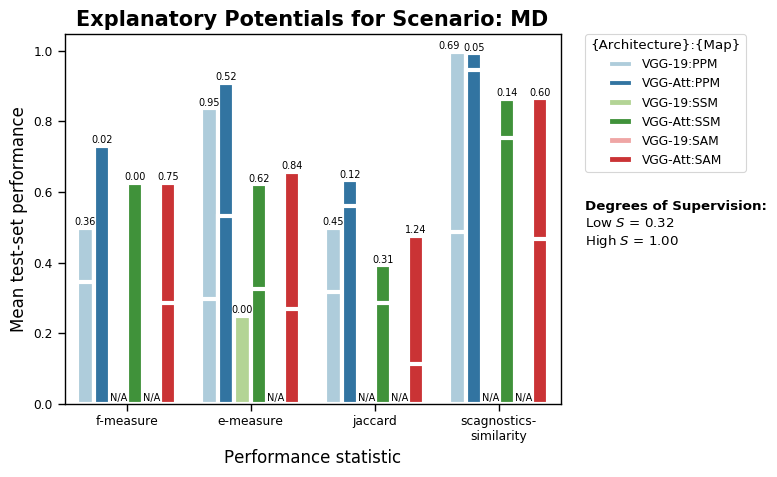

In [48]:
jointbars_plotter("md", results, ["f", "e", "jaccard", "scagcos"], S_dict_nonmil, map_type="both")

In [18]:
# from pylab import *
import matplotlib

In [23]:
def plotter_violins(scenario, results, sup_dict, map_type="both", mil_flag=False):
    if mil_flag == True:
        mil_str = "MIL datasets"
    else:
        mil_str = "Non-MIL datasets"
    
    if scenario == "evp":
        exp_str = "extreme_value_pixels"
    elif scenario == "dsp":
        exp_str = "distribution_shifted_pixels"
    elif scenario == "md":
        exp_str = "morphological_differences"
    elif scenario == "mdsp":
        exp_str = "morphological_differences_superpixels"
    elif scenario == "evsp":
        exp_str = "extreme_value_superpixels"
    elif scenario == "gsp":
        exp_str = "guilty_superpixels"
    elif scenario == "fm":
        exp_str = "fractal_morphologies"
    else:
        pass
    
    legit_words = ["extreme", "value", "pixels", "distribution", "shifted", "guilty",
                   "morphological", "differences", "superpixels", "fractal", "morphologies"]
    
    # get relevant experiment rows
    results['exp_terms'] = results['experiment'].apply(lambda x: "_".join([word  for word in x.split("_") if word in legit_words]))    
    s_rows = results.loc[results['exp_terms'] == exp_str]

    print(s_rows.shape)
    if s_rows.shape[0] < 4:
        print("Error: Unsubstantial amount of experiments run. Please get predictions first. Exiting.")
        return
    
    # get all cols that are relevant for max
    stat_cols = [col for col in s_rows.columns]
        
    if map_type == "explanation":
        valid_maps = ["ssm", "sam"]
    elif map_type == "prediction":
        valid_maps = ["ppm"]
    elif map_type == "both":
        valid_maps = ["ppm","ssm", "sam"]

    stat_cols = [s for s in stat_cols if any(substring in s for substring in valid_maps)]
    df = s_rows[["experiment"] + stat_cols]
    print("row num", df.shape)
    
    # create filter, model, labeling_fn rows
    df['filter'] = df['experiment']
    df['model'] = df['experiment']
    df['labeling_fn'] = df['experiment']
    
    # begin featurizing
    df['filter'].loc[df['filter'].str.contains("none")] = "none"
    df['filter'].loc[df['filter'].str.contains("background")] = "background"
    df['model'].loc[df['model'].str.contains("VGG19")] = "VGG-19"
    df['model'].loc[df['model'].str.contains("VGG_att")] = "VGG-Att"
    df['labeling_fn'].loc[df['labeling_fn'].str.contains("inheritance")] = "ili"
    df['labeling_fn'].loc[df['labeling_fn'].str.contains("seg")] = "seg"
    
    molten = pd.melt(df.reset_index(), id_vars=["model", "filter", "labeling_fn"])
    molten = molten[(molten.variable != "index") & (molten.variable != "experiment")]
    
    molten['map'] = molten['variable']
    for vm in valid_maps:
        molten['map'].loc[molten['map'].str.contains(vm)] = vm
    
    molten['stat'] = molten['variable'].apply(lambda x: x.split("_")[1]) 
    
    stat_list = list(set(molten["stat"].tolist()))
    stat_list = ["_" + s for s in stat_list]
    # print(stat_list)
    
    molten['stat'].loc[(molten['stat'].astype("str") == "s") | (molten['stat'].astype("str") == "e") | (molten['stat'].astype("str") == "f")] = molten['stat'] + "-measure"
        

    molten['mean'] = molten["value"].apply(lambda row: strip_means(row))
    molten['ci'] = molten["value"].apply(lambda row: strip_cis(row))
    molten['name'] = molten["map"] + "_" + molten["model"]
    
    molten.loc[(molten['stat'] == "scagcos") & (molten['mean'] != np.nan) & (molten['mean'] != 0), 'mean'] = 1 - molten['mean']
    molten.loc[molten['stat'] == "scagcos", 'stat'] = "scagnostics-\nsimilarity"

    
    molten['full'] = molten["filter"] +"_"+ molten["name"] +"_"+ molten['variable'].map(lambda x: x.split('_')[1])
    molten['order'] = molten["full"]
    counter = 0
    for l,f in enumerate(["background", "none"]):
        for i,s in enumerate(stat_list):
            for j,emap in enumerate(valid_maps):
                for k,model_str in enumerate(["VGG-19", "VGG-Att"]):
                    counter += 1
                    # print(f+"_"+emap+"_"+model_str+s)
                    molten['order'].loc[molten['order'] == f+"_"+emap+"_"+model_str+s] = counter

    molten = molten.sort_values('order')


    results_dict = {}
    for i, g in enumerate(molten.groupby("filter")): # used to be filter
        groupedvalues = g[1]
        # print(groupedvalues)
        for j, h in enumerate(groupedvalues.groupby(["name", "labeling_fn"])):
            # print(h[1])
            key = h[1]["name"].tolist()[0] + "_" + h[1]["filter"].tolist()[0]
            vals = h[1]["mean"].values.tolist()
            results_dict[key] = vals
    
    visited = []
    labs = []
    to_plot = []
    for k in results_dict.keys():
        # print(k)
        # print(visited)
        if k not in visited:
            vec1 = np.array(results_dict[k])
            visited.append(k)

            tokens = k.split("_")
            if tokens[2] == "none":
                other = "background"
            elif tokens[2] == "background":
                other = "none"
            
            lab = "_".join(tokens[0:2])
            other_k = lab + "_" + other
            labs.append(lab)
            
            vec2 = np.array(results_dict[other_k])
            visited.append(other_k)
            
            Ps = np.abs(vec1 - vec2) / ((vec1+vec2)/2)
            filtered_Ps = Ps[~np.isnan(Ps)]
            if len(filtered_Ps) == 0:
                to_plot.append(Ps)
            else:
                to_plot.append(filtered_Ps)
                    
    # plt.figure()
    # figure(figsize=(6, 8), dpi=80)
    # sns.reset_defaults()
    # sns.set_context('paper')
    print(to_plot)
    fig, ax = plt.subplots()
    vp = ax.violinplot(to_plot, [2, 4, 6, 8, 10, 12], widths=2, showmeans=True, showmedians=True, showextrema=False)
    
    colors=[]
    cmap = matplotlib.cm.get_cmap('Paired', 12)   
    for i in range(cmap.N):
        rgba = cmap(i)
        # rgb2hex accepts rgb or rgba
        colors.append(matplotlib.colors.rgb2hex(rgba))
    
    for i, pc in enumerate(vp['bodies']):
        pc.set_facecolor(colors[i])
        pc.set_edgecolor('white')
        pc.set_alpha(1)
    
    plt.title('Explanatory Potentials for Scenario: ' + scenario.upper(), fontweight="bold", fontsize=15)
    plt.xlabel('Output Map', fontsize=12)
    plt.xticks(ticks=[2,4,6,8,10,12], labels=labs, rotation=20)
    plt.ylabel('Explanatory Potentials over all statistics', fontsize=12)
    # labs = ["VGG-19:PPM", "VGG-Att:PPM", "VGG-19:SSM", "VGG-Att:SSM", "VGG-19:SAM", "VGG-Att:SAM"]
    # plt.legend(title='{Architecture}:{Map}', loc=2, labels=labs, bbox_to_anchor=(1.05, 1), borderaxespad=0.)

    plt.show()



(4, 65)
row num (4, 35)
[array([1.16079632, 0.36492891, 0.68644639, 0.44907975, 0.        ,
       1.16079632, 0.49468085, 0.25282167, 0.        , 0.95238095]), array([1.12967033, 0.01518288, 0.04747162, 0.12238055, 0.21354484,
       1.12967033, 0.49302326, 0.02108222, 0.01537386, 0.52222222]), array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]), array([0.8091954 , 0.74725275, 0.5975976 , 1.23809524, 0.44814341,
       1.7658934 , 0.01207243, 1.01997337, 1.29001585, 0.83801296,
       2.        ]), array([0.5380334 , 0.5380334 , 0.        , 0.62906725, 0.        ,
       2.        ]), array([0.51984635, 0.00319489, 0.13861386, 0.31268437, 0.20463539,
       0.53968254, 0.05965463, 0.61538462, 0.2082912 , 0.49017038,
       0.62447257, 1.94405594])]


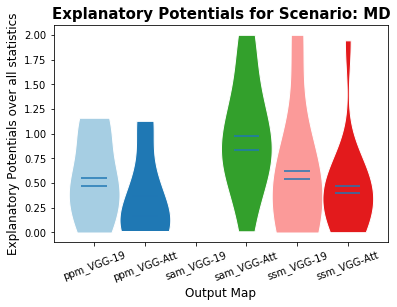

In [24]:
plotter_violins("md", results, S_dict_nonmil, map_type="both")

In [221]:
# def plotter_mpl(scenario_list, results, stat, Cv_dict, map_type="both", mil_flag=False):
#     if mil_flag == True:
#         mil_str = "MIL datasets"
#     else:
#         mil_str = "Non-MIL datasets"
        
#     plt.figure()
#     for s in scenario_list:
#         if s == "evp":
#             exp_str = "extreme_value_pixels"
#         if s == "dsp":
#             exp_str = "distribution_shifted_pixels"
#         else:
#             pass
        
#         # get relevant experiment rows
#         s_rows = results.loc[results['experiment'].str.contains(exp_str)]
        
#         # get all cols that are relevant for max
#         stat_cols = [col for col in s_rows.columns if stat in col]
#         if map_type == "explanation":
#             valid_stats = ["sam", "ssm"]
#         elif map_type == "prediction":
#             valid_stats = ["ppm"]
#         elif map_type == "both":
#             valid_stats = ["ppm","sam", "ssm"]
        
#         stat_cols = [s for s in stat_cols if any(substring in s for substring in valid_stats)]
#         stat_col_s_rows = s_rows[["experiment"] + stat_cols]
#         print("rows", stat_col_s_rows.head())
        
#         xs = [Cv_dict[s+"-p"], Cv_dict[s+"-f"]]
        
#         # get preserved, filtered separate
#         rows_p = stat_col_s_rows.loc[stat_col_s_rows['experiment'].str.contains("none")]
#         rows_f = stat_col_s_rows.loc[stat_col_s_rows['experiment'].str.contains("background")]
        
#         # find max y
#         p_maxes = find_maxes(rows_p)
#         f_maxes = find_maxes(rows_f)
        
#         # now, orient to keep same models together
#         to_plot = np.concatenate([np.expand_dims(np.array(p_maxes), 1).T, np.expand_dims(np.array(f_maxes), 1).T], axis=0)
#         # ipdb.set_trace()
#         print("final", to_plot)
#         print(xs)
        
#         colors_pred = ["slateblue", "salmon"]
#         colors_expl = [ "darkslateblue", "darksalmon"]
#         models = ["VGG-19", "VGG-Att"]
#         # x = ["VGG-19 $\widehat{y}$", "VGG-19 $\widehat{\mathcal{M}}$", "VGG-Att $\widehat{y}$", "VGG-Att $\widehat{\mathcal{M}}$"]
#         x_lab = ["VGG-19 $\widehat{y}$", "VGG-Att $\widehat{y}$"]
#         labels = [["VGG-19 ($S$)", "VGG-19 (hi$S$)"], ["VGG-Att (lo$S$)", "VGG-Att (hi$S$)"]]
#         x_loc = np.arange(len(labels))
#         w = 0.35  # the width of the bars

        
#         for i in range(len(to_plot)):
#             if i == 0:
#                 bot = to_plot[i,:]
#                 print(x_loc, bot, colors_pred, labels[i])
#                 plt.bar(x_loc, bot, color=colors_pred, width=w, edgecolor ='k', label=labels[i])
#             else:
#                 print(x_loc, bot, colors_expl, labels[i])
#                 plt.bar(x_loc, to_plot[i,:]-bot, bottom=bot, color=colors_expl, width=w, edgecolor ='k', label=labels[i])
            
#             a,b = to_plot[0,i], to_plot[1,i]
#             delta = np.abs(a-b)
#             c = (a+b)/2
#             print(delta, c)
#             P = delta/c # relative difference or percentage difference
#             print(models[i], P)
            
#     flat_labels = [item for sublist in labels for item in sublist]
#     print(flat_labels)
#     # plt.legend(flat_labels)
#     plt.xlabel('Test-set:'+stat, fontsize=12)
#     # plt.xticks([r + 0.25 for r in range(len(to_plot))], ['low ('+str(round(xs[0],3))+")", 'high ('+str(xs[1])+")"])
#     # plt.ylabel(stat + " " + map_type)
#     plt.title("Test set performance profiles over " + mil_str, fontsize=13)
#     plt.show()
    

rows                                           experiment        ppm_dice
2  VGG19_distribution_shifted_pixels_background_i...   0.499 (0.100)
3  VGG_att_distribution_shifted_pixels_background...   0.949 (0.013)
4  VGG19_distribution_shifted_pixels_none_inherit...   0.443 (0.089)
5  VGG_att_distribution_shifted_pixels_none_inher...   0.813 (0.030)
 0.443 (0.089) <class 'str'>
 0.813 (0.030) <class 'str'>
 0.499 (0.100) <class 'str'>
 0.949 (0.013) <class 'str'>
final [[0.443 0.813]
 [0.499 0.949]]
[0.41590080439031724, 1]
[0 1] [0.443 0.813] ['slateblue', 'salmon'] ['VGG-19 ($S$)', 'VGG-19 (hi$S$)']
0.055999999999999994 0.471
VGG-19 0.11889596602972398
[0 1] [0.443 0.813] ['darkslateblue', 'darksalmon'] ['VGG-Att (lo$S$)', 'VGG-Att (hi$S$)']
0.136 0.881
VGG-Att 0.15437003405221342
['VGG-19 ($S$)', 'VGG-19 (hi$S$)', 'VGG-Att (lo$S$)', 'VGG-Att (hi$S$)']


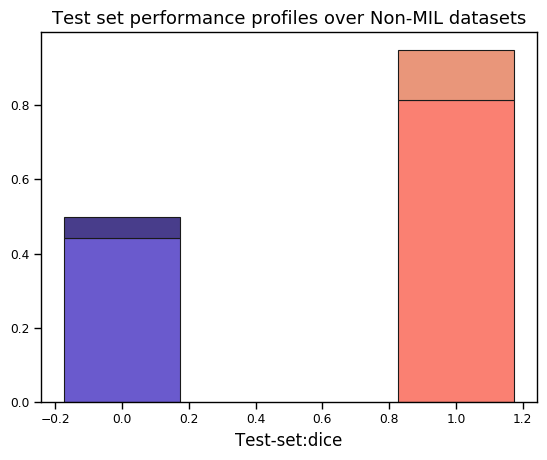

In [222]:
plotter_mpl(["dsp"], results, "dice", S_dict, map_type="prediction")